In [2]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath
from Functions import *


In [3]:

GBWA=np.load("GBWA_Output.npy")
GBNA = np.load("GBNA_Output.npy")
JWA = np.load('JWA_Output.npy')
JNA = np.load('JNA_Output.npy')

GBWA = GBWA[:,:,:,0]
GBNA = GBNA[:,:,:,0]
JWA = JWA[:,:,0]
JNA = JNA[:,:,0] 

In [4]:
PAr_int =np.linspace(0,1000,20)
PXe_int = np.array([10,25,45])


omega0 = 0.5e-2
b=k355*omega0**2
zR = b / 2     # [m] Rayleigh Range

b_int = np.array([f_to_b(omega0,20e-2),f_to_b(omega0,50e-2),f_to_b(omega0,75e-2)])
f_int = np.array([20e-2,50e-2,75e-2])




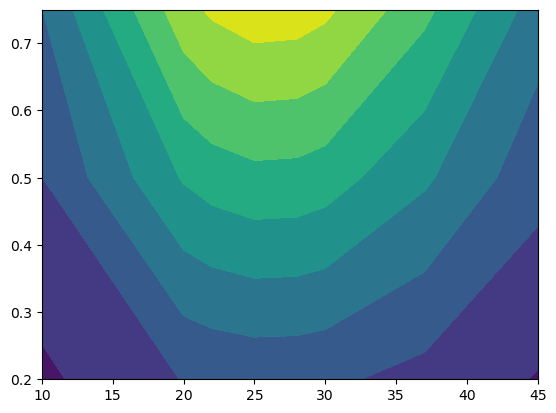

In [131]:
PXe_, f_ = np.meshgrid(PXe_int, f_int)
plt.contourf(PXe_,f_,JWA)

Text(0, 0.5, 'Argon Pressure (Torr)')

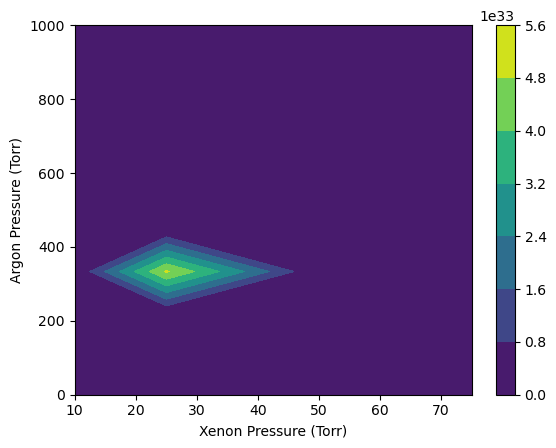

In [5]:
PXe_, PAr_ = np.meshgrid(PXe_int, PAr_int)
plt.contourf(PXe_, PAr_,GBWA[2])
plt.colorbar()
plt.xlabel('Xenon Pressure (Torr)')
plt.ylabel('Argon Pressure (Torr)')
#plt.plot(b,2/b,color='r')
#plt.savefig(NA_Name)

TypeError: Shapes of x (10, 4) and z (3, 4) do not match

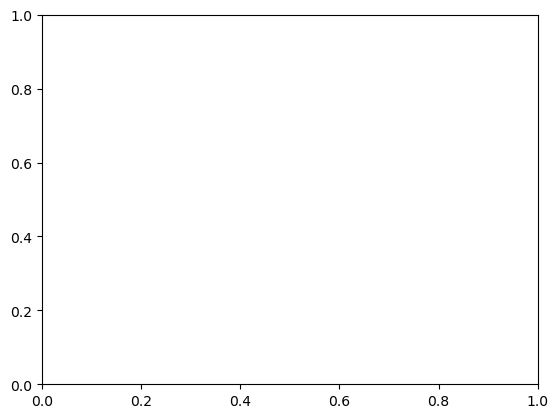

In [ ]:
# PXe_, PAr_ = np.meshgrid(PXe_int, PAr_int)
# plt.contourf(PXe_, PAr_,JWA)
# plt.colorbar()
# plt.xlabel('Xenon Pressure (Torr)')
# plt.ylabel('Argon Pressure (Torr)')
# plt.title("Johns Model With Absorption f=75cm")
# #plt.plot(b,2/b,color='r')
# #plt.savefig(NA_Name)

In [ ]:
np.max(JWA[1])


1.7128628612306161133e+34

In [ ]:
cp = np.where(JWA[0] == 6.851514755931267984e+33)



print(cp)
#cp_Xe = cp[1][0]
#print(cp_Xe) #max pressure index



(array([], dtype=int64), array([], dtype=int64))


In [ ]:
Opt_Pxe_GBWA= np.array([PXe_int[1],PXe_int[1],PXe_int[1]])
Opt_PAr_GBWA = np.array([PAr_int[6],PAr_int[3],PAr_int[3]])




[]

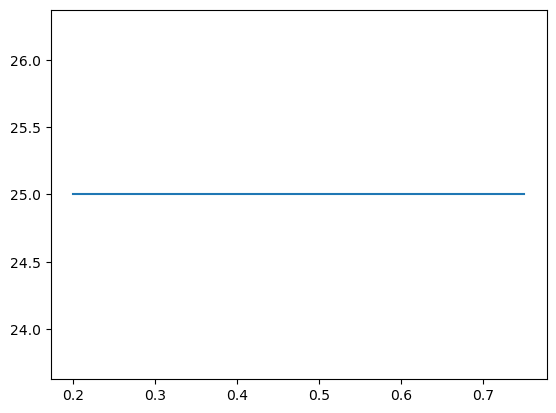

In [ ]:
f_int = b_to_f(omega0,b_int)
plt.plot(f_int,Opt_Pxe_GBWA)
plt.plot()
plt.tittle()

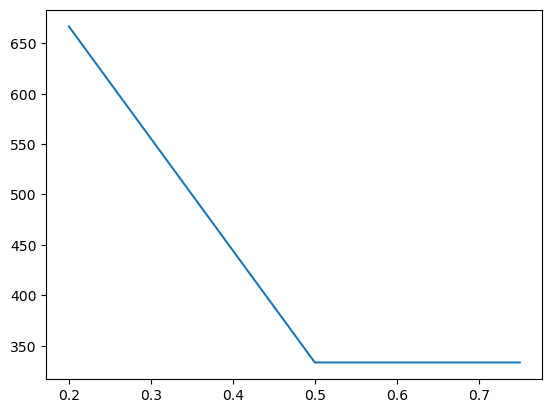

In [ ]:
plt.plot(f_int,Opt_PAr_GBWA)
plt.xlabel()

# Phase Matching Curves With Argon

0
1
2


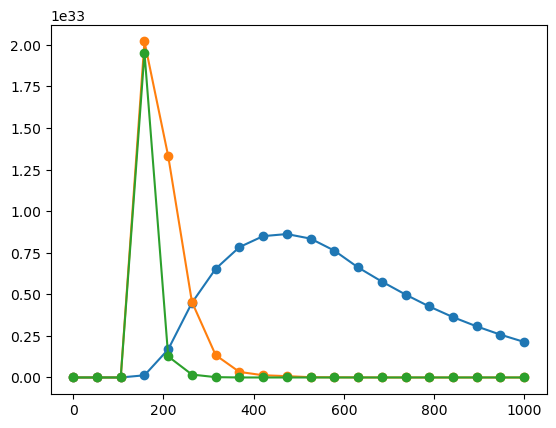

0
1
2


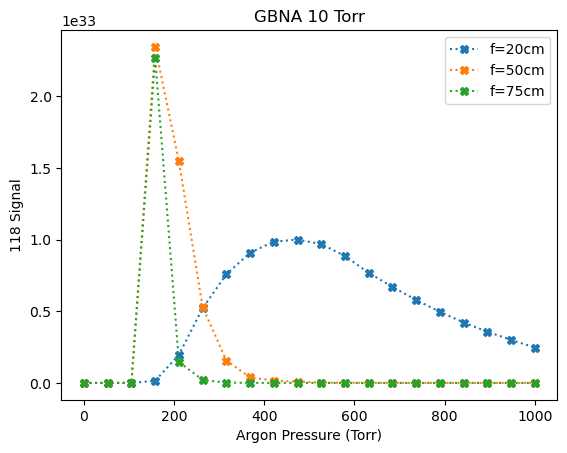

In [12]:

for i in range(0,3):
    print(i)
    plt.plot(PAr_int,GBWA[i][:,0],marker ='o')
plt.show()

for i in range(0,3):
    print(i)
    plt.plot(PAr_int,GBNA[i][:,0],linestyle='dotted',marker ='X')


plt.xlabel('Argon Pressure (Torr)')
plt.ylabel('118 Signal')
plt.title('GBNA 10 Torr')
plt.legend(['f=20cm','f=50cm','f=75cm','f=20cm','f=50cm','f=75cm'])
plt.show()


0
1
2


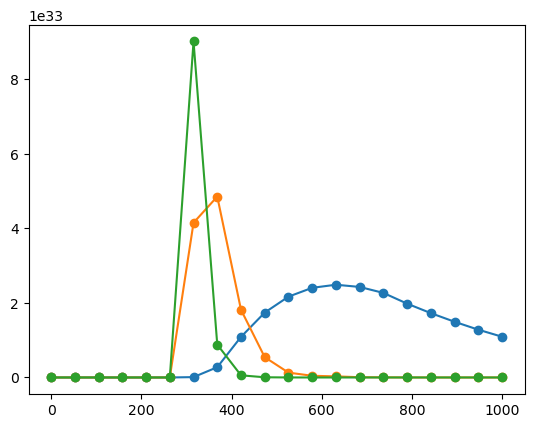

0
1
2


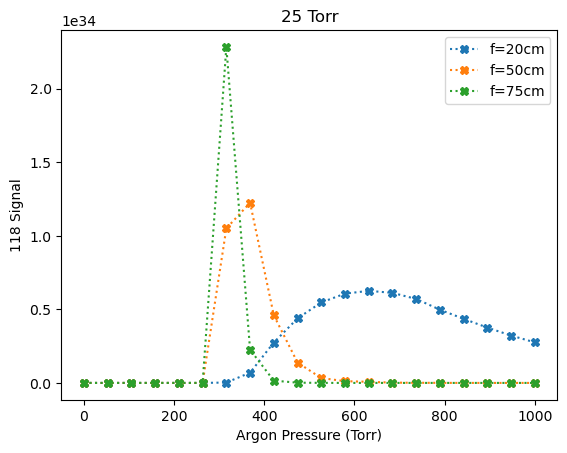

In [10]:

for i in range(0,3):
    print(i)
    plt.plot(PAr_int,GBWA[i][:,1],marker ='o')

plt.show()
for i in range(0,3):
    print(i)
    plt.plot(PAr_int,GBNA[i][:,1],linestyle='dotted',marker ='X')


plt.xlabel('Argon Pressure (Torr)')
plt.ylabel('118 Signal')
plt.title('25 Torr')
plt.legend(['f=20cm','f=50cm','f=75cm','f=20cm','f=50cm','f=75cm'])
plt.show()


In [159]:
np.where(GBWA[2][:,1] ==GBWA[2,:,1].max())


(array([6]),)

In [160]:
PAr_int[6]

315.7894736842105

0
1
2


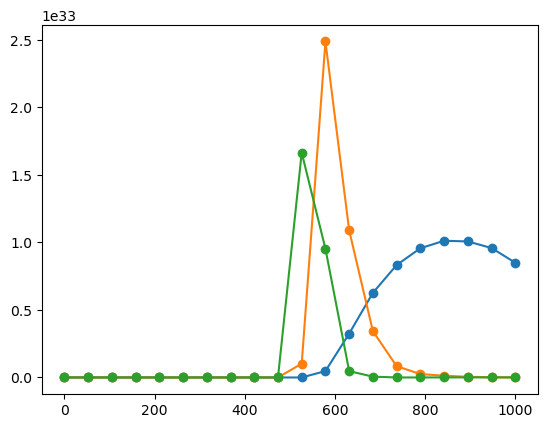

0
1
2


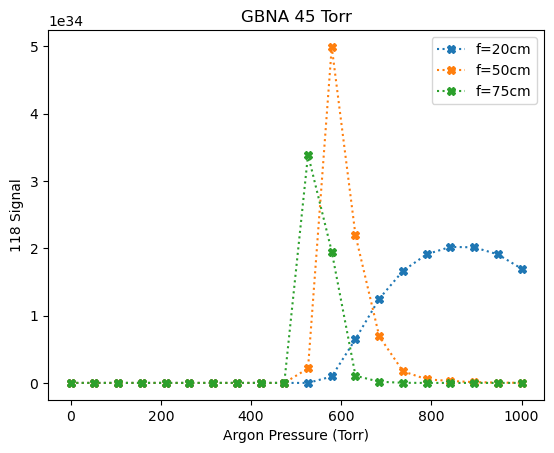

In [9]:

for i in range(0,3):
    print(i)
    plt.plot(PAr_int,GBWA[i][:,2],marker ='o')

plt.show()
for i in range(0,3):
    print(i)
    plt.plot(PAr_int,GBNA[i][:,2],linestyle='dotted',marker ='X')


plt.xlabel('Argon Pressure (Torr)')
plt.ylabel('118 Signal')
plt.title('GBNA 45 Torr')
plt.legend(['f=20cm','f=50cm','f=75cm','f=20cm','f=50cm','f=75cm'])
plt.show()


In [7]:

for i in range(0,3):
    print(i)
    plt.plot(PAr_int,GBWA[i][:,3],marker ='o')


for i in range(0,3):
    print(i)
    plt.plot(PAr_int,GBNA[i][:,],linestyle='dotted',marker ='X')


plt.xlabel('Argon Pressure (Torr)')
plt.ylabel('118 Signal')
plt.title('GBNA 10 Torr')
plt.legend(['f=20cm','f=50cm','f=75cm','f=20cm','f=50cm','f=75cm'])
plt.show()


0


IndexError: index 3 is out of bounds for axis 1 with size 3

# Pressure Scans at Different focal lengths

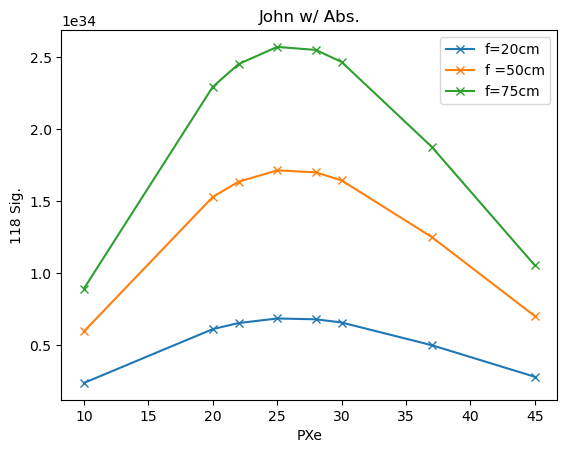

In [133]:
JWA_PM = JWA

for b_index in range(3):
    plt.plot(PXe_int,JWA_PM[b_index,:],marker = "x")

plt.legend(['f=20cm','f =50cm','f=75cm'])
plt.xlabel('PXe')
plt.ylabel('118 Sig.')
plt.title('John w/ Abs.')
plt.show()

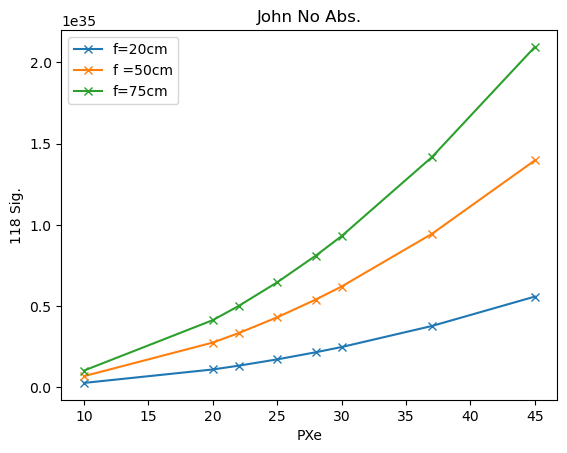

In [132]:
JNA_PM = JNA

for b_index in range(3):
    plt.plot(PXe_int,JNA_PM[b_index,:],marker = "x")

plt.legend(['f=20cm','f =50cm','f=75cm'])
plt.xlabel('PXe')
plt.ylabel('118 Sig.')
plt.title('John No Abs.')
plt.show()

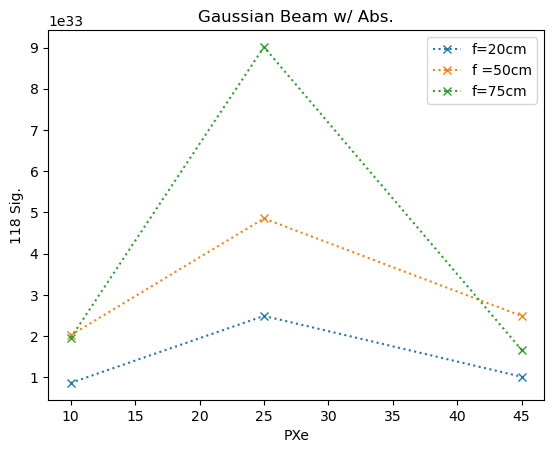

In [142]:
GBWA_PM = GBWA.max(axis =1)

for b_index in range(3):
    plt.plot(PXe_int,GBWA_PM[b_index,:],linestyle = ':',marker = "x")


plt.legend(['f=20cm','f =50cm','f=75cm'])
plt.xlabel('PXe')
plt.ylabel('118 Sig.')
plt.title('Gaussian Beam w/ Abs.')
plt.show()

# First Attempt at recreating Fig. 4 from johns paper (with low Res. Phasematch Curve figure)

In [149]:
R_opt = np.zeros((3,3))
for b_index in range(3):
   for PXe_index in range(3):
   #print(GBWA[b_index,:,0].max())
      maxVal = GBWA[b_index,:,PXe_index].max()
      critical_index = np.where(GBWA[b_index,:,PXe_index] == maxVal)
      R_opt[b_index,PXe_index] = PAr_int[critical_index]/PXe_int[PXe_index]



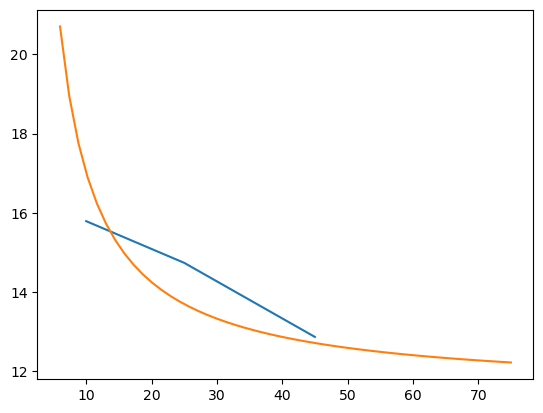

In [151]:
CXe= -6.12E-21 #m^2
CAr = 5.33E-22 #m^2

plt.plot(PXe_int,R_opt[1,:])
R = lambda Pxe : 2/(b_int[1] * Pxe*Torr_to_m3*CAr) - CXe/CAr

x =np.linspace(6,75)

plt.plot(x,R(x))

In [ ]:
GBWA[1,:,1].max()
GBWA[b_index,:,1].max()

4.9112689146960576e+33